# The $t$ distribution

When $n$ is small, the Central Limit Theorem does not apply

However as we shall see here, if the parent or population distribution is normal, the sampling distribution of the mean for small samples has a known shape, namely the $t$ distribution

The $t$ distribution looks quite like a normal distribution but has a pointy top and heavy tails. 

The difference in the tails, whilst visually not that striking, is really important, because samples means of interest (those which area long way above or below the population mean) are, by definition, in the tails ofthe distribution.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Create the simulated dataset

We use the function <tt>np.random</tt> to simulate the heights of 10,000 women, drawn from a normal distribution

Let's plot a histogram of the hieghts and overlay the (theoretical) PDF used to generate the data, for comparison

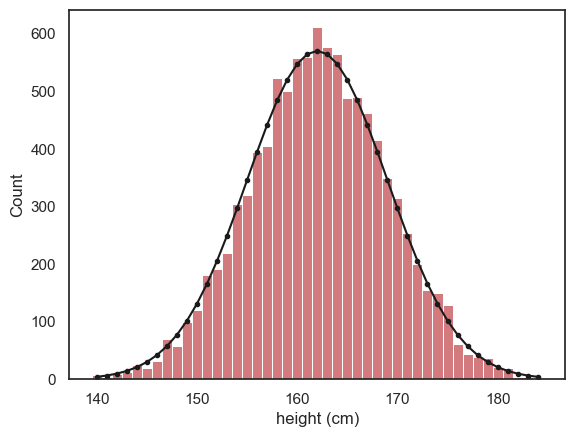

In [2]:
women = np.random.normal(162,7, [10000])

x=range(140,185) # suitable range of x-axis values
p = stats.norm.pdf(x, 162, 7)
freq = p*10000

sns.histplot(women, color='r', label='women', bins=np.arange(139.5,185.5,1)) # note bin boundaries not quite =x
plt.plot(x,freq,'k.-')

plt.xlabel('height (cm)')
plt.show()

<b>Python Note - matching the PDF to the histogram</b>
<ul>
<li> The x values for the pdf are integers (140,141,142....190) so we plot the point PDF at each whole number of cm
<li> The bins for the histogram correspond to the range of heights that are rounded to each full cm - (139.5-140.5, 140.5-141.5, 141.5-142.5 ..... etc) )
</ul>

Additionally, we have to think about scaling the PDF to match the histogram
<ul>
    <li> The PDF gives a probability function such that the probability of one datapoint falling in one unit range on the x axis is the area under the curve - for example the probability of a given woman's height falling between 159.5cm and 160.5 cm is the area under the curve between x=159.5 and x=160.5
    <li> Therefore to predict the number of cases in a histogram bin spanning x = 159.5-160.5, we simply multiply the PDF values in this range by the number of women in the sample
    <li> If our bin is not 1 unit wide, we need to also multiply by the bin width - for example a bin 0.1 cm wide will contain about 1/10 of the cases that a in 1cm wide would (this is the case in the following example)
</ul>


Finally - fiddly point- why do we sometimes use <tt>range()</tt> and sometimes <tt>np.arange</tt>?
<ul>
<li> <tt>range</tt> can only return integer values, so if I want decimal values (as for the bins above) I need to use <tt>np.arange()</tt>
</ul> 

## Large sample size

Here I draw 10,000 samples of size 100 and show that the sampling distribution of the mean is Normal using a histogram and a Q-Q plot:

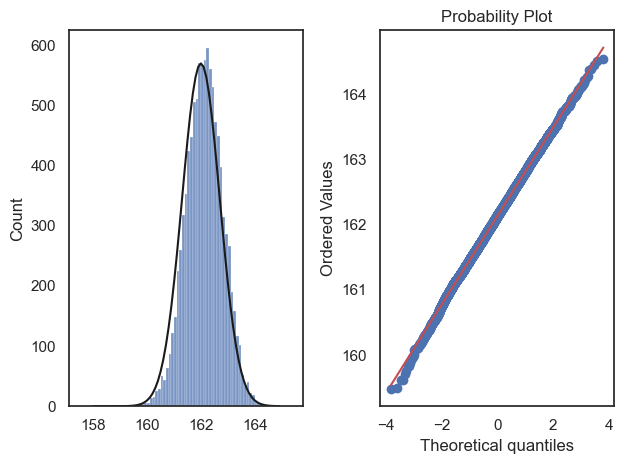

In [3]:
nReps = 10000
n=100
binwidth=0.1

m = np.empty(10000)

for i in range(nReps):
    sample = np.random.choice(women, n, replace=False)
    m[i]=sample.mean()
    
plt.subplot(1,2,1)
sns.histplot(m, bins = np.arange(157.5,165.5,binwidth))

x=np.arange(158,165,binwidth)
p = stats.norm.pdf(x,162,7/(n**0.5))
freq=p*nReps*binwidth # number of people expected in each bin is PDF * binwidth * nReps
plt.plot(x,freq,'k-')

plt.subplot(1,2,2)
stats.probplot(m, plot=plt)


plt.tight_layout()
plt.show()

We note that:
<ul>
    <li> The predicted normal curve lies neatly over the simulation histogram indicating a good fit
    <li> Most of the points in the Q-Q plot fall on a straight line, indicating a good fit, including in the tails of the distribution
</ul>

### Estimating $\sigma$ with $s$

Above, we calculated the sample mean $m$ for each sample. We can think of each of these sample means $m$ as an estimate of the mean $\mu$ of the parent (population) distribution - in real life we would usually <i>only</i> have one sample and therefore our (single) value of $m$ would be the only estimate we have of $\mu$

We can similarly estimate the population standard deviation $\sigma$ using the sample standard deviation $s$.

Let's do this for 10,000 samples and plot a histogram:

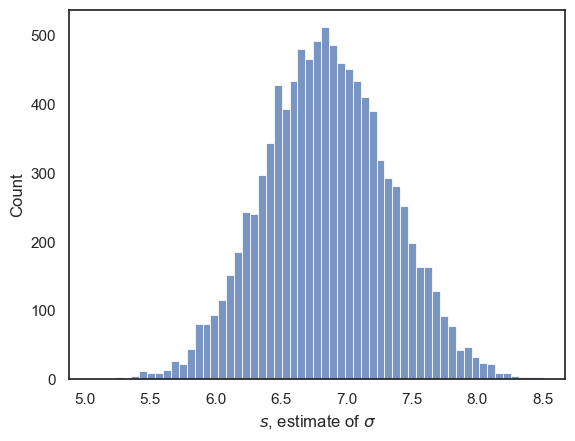

In [4]:
nReps = 10000
n=100

s = np.empty(10000)

for i in range(nReps):
    sample = np.random.choice(women, n, replace=False)
    s[i]=sample.std()
    
sns.histplot(s)
plt.xlabel('$s$, estimate of $\sigma$')
plt.show()

Note that the Central Limit Theorem does <b><i>not</i></b> tell us that $s$ is normally distributed - only $m$ has that honour.

Technically $s$ follows a gamma distribution which is more or less normal for large $n$ (but not at all for small $n$ as we shall see)

Just for fun let's fit the best fitting normal distribution and overlay it.

<ul>
    <li> Think - what do we mean by the 'best fitting normal distribution'
    <li> It was covered in the exercise last week on 'Normal approximation to the binomial'
</ul>

mean simulated value of s is 6.853003113920476


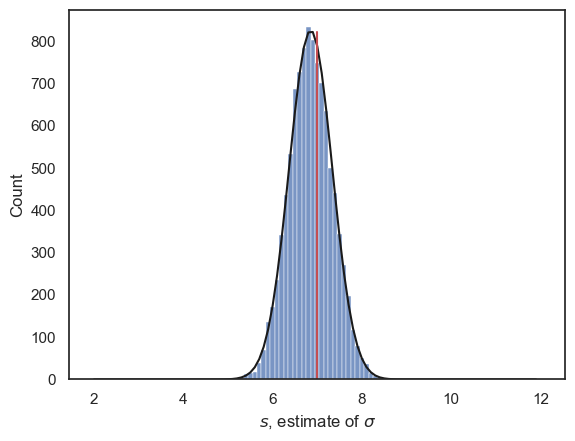

In [5]:
mean_of_s = s.mean()
sd_of_s = s.std()
binwidth = 0.1

x = np.arange(2,12,binwidth) # a suitable range for x axis values
p = stats.norm.pdf(x, mean_of_s, sd_of_s)
freq = p*nReps*binwidth


sns.histplot(s, bins=np.arange(1.95, 12.05, binwidth)) # plot the simulated values of sigma
plt.plot(x,freq,'k') # plot the best fitting normal

plt.plot([7,7],[0,freq.max()],'r') # plot a vertical line at s=7, the true value of sigma
print('mean simulated value of s is ' + str(s.mean()))

plt.xlabel('$s$, estimate of $\sigma$')
plt.show()

## Small sample size

Now we will repeat the simulation with a smaller value of $n$.

I've grouped together the code to sample $m$ and $s$ into a single code block so you can try a few values of $n$ and see how the distributions of $m$ and $s$ change

mean simulated value of m is 162.13485356528335
mean simulated value of s is 6.843419253758089


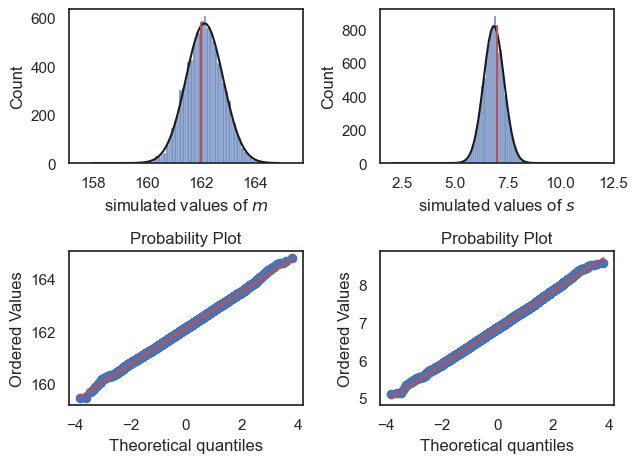

In [6]:
nReps = 10000
n=100

m = np.empty(nReps)
s = np.empty(nReps)

# run the simulation
for i in range(nReps):
    sample = np.random.choice(women, n, replace=False)
    m[i]=sample.mean()
    s[i]=sample.std()
    
########################################    
# The rest of this is just plotting! You don't need to go through it unless you think that is fun.

# histogram of m   
binwidth=0.1
plt.subplot(2,2,1)
sns.histplot(m, bins = np.arange(157.5,165.5,binwidth))
plt.xlabel('simulated values of $m$')

# overlay the best fitting normal
mean_of_m = m.mean()
sd_of_m = m.std()
binwidth = 0.1
x = np.arange(158,165,binwidth) # a suitable range for x axis values
p = stats.norm.pdf(x, mean_of_m, sd_of_m)
freq = p*nReps*binwidth
plt.plot(x,freq,'k') # plot the best fitting normal

# vertical line at the 'true' value of m
plt.plot([162,162],[0,freq.max()],'r') # plot a vertical line at s=7, the true value of sigma
print('mean simulated value of m is ' + str(m.mean()))

# Q-Q plot of m
plt.subplot(2,2,3)
stats.probplot(m, plot=plt)

# histogram of s    
binwidth=0.1
plt.subplot(2,2,2)
sns.histplot(s, bins=np.arange(1.95, 12.05, binwidth))
plt.xlabel('simulated values of $s$')

# overlay the best fitting normal
mean_of_s = s.mean()
sd_of_s = s.std()
binwidth = 0.1
x = np.arange(2,12,binwidth) # a suitable range for x axis values
p = stats.norm.pdf(x, mean_of_s, sd_of_s)
freq = p*nReps*binwidth
plt.plot(x,freq,'k') # plot the best fitting normal

# vertical line at the 'true' value of m
plt.plot([7,7],[0,freq.max()],'r') # plot a vertical line at s=7, the true value of sigma
print('mean simulated value of s is ' + str(s.mean()))

# Q-Q plot of s
plt.subplot(2,2,4)
stats.probplot(s, plot=plt)



plt.tight_layout()
plt.show()

<img src="images/Minion_what.jpg" width=10% alt="What?!" >

Don't worry about all that plotting code

What I want you to do is look at the figures and notice that when $n=100$:
    <ul>
    <li> The estimates of m and s are not bad 
    <li> The random variation in m and s between samples is fairly symmetrical (values above and below the true values mu and sigma are equally likely)
    <li> The Q-Q plot shows that normal distribution is not a bad fit to the sampling distribution of m and s (but note as mentioned above, the distribution of s is actually a different-shaped distribution, the gamma, which looks normal-ish for large n)
    </ul>
    
#### Try changing $n$

Now I want you to reduce $n$ to a small value, say $n=5$

What do you notice changes in the plots?

<ul>
    <li> Is the sampling distribution of m still normal (answer: yes)
    <li> Is the sampling distribution of s still symmetrical?
    <ul>
         <li> Are we under- or over-estimating s?
         <li> How is the non-normal shape of the sampling distribution of s reflected in the Q-Q plot?
    </ul>
</ul>

You can also try some intermediate values of $n$ 

## The $t$ distribution

The phenomena above can be summaried as follows - for data drawn from a Normal parent or population distribution
    
<ul>
<li> The sampling distribution of the mean, m, is always normal for any value of n
<li> The sampling distribution of the standard deviation, s, is a gamma distribution
    <ul> 
    <li>It has positive skew
    <li>s tends to underestimate sigma when n is small
    </ul>
</ul>

Now, if we want to know how unlikely a value of $m$ is given some parent population parameters $\mu$ and $\sigma$, we might try to covert it to a Z-score (remember those from last week?) using the formula:

$$ Z = \frac{x-\mu}{\frac{\sigma}{\sqrt{n}}} $$

... estimating $\mu$ by $\bar{x}$ (which we have also called $m$) and $\sigma$ by $s$:

$$ Z = \frac{x-\bar{x}}{\frac{s}{\sqrt{n}}} $$

But when $n$ is small this goes wrong as $s$ gives us a skewed estimate of $\sigma$, as we see if we actually calculate "Z" for each simulated sample (which we shall call $t$, for reasons you are about to see), and plot them on a histogram with the $Z$ distribution overlaid



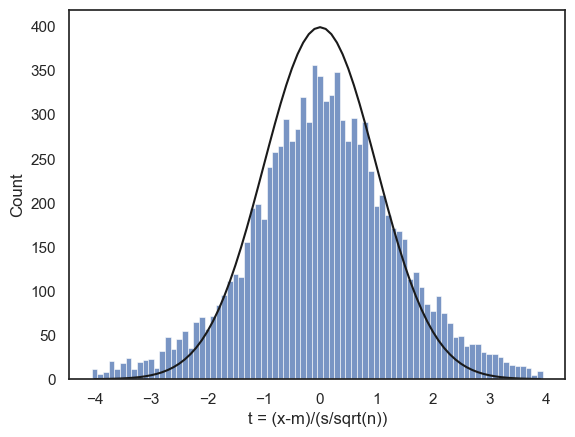

In [7]:
nReps = 10000
n=5

m = np.empty(nReps)
s = np.empty(nReps)
t = np.empty(nReps)

# run the simulation
for i in range(nReps):
    sample = np.random.choice(women, n, replace=False)
    m[i]=sample.mean()
    s[i]=sample.std()
    t[i]=(sample.mean()-162)/(sample.std()/(n**0.5))

# histogram of t
binwidth=0.1
sns.histplot(t, bins = np.arange(-4.05,4.05,binwidth))

# predicted Normal (if the Central Limit Theorem applied, which it doesn't for n=5!)
x=np.arange(-4,4,binwidth)
p=stats.norm.pdf(x, 0, 1) # IF CLT applied the t values would follow N(0,1)
freq=p*nReps*binwidth
plt.plot(x,freq,'k')

plt.xlabel('t = (x-m)/(s/sqrt(n))')
plt.show()

We can see a particular problem in the tails of the distribution - the fit between the predicted Normal and the simulated histogram is poor.

We would expect Z<-1.96 or Z>1.96 to happen 5% of the time (we covered this in the prep work on confidence intervals). How often do they happen in this simulation?

In [8]:
100 * (sum(t>1.96) + sum(t<-1.96))/len(t)

15.89

Uh-oh, 15% of the time instead of 5%!

### Student's $t$

Fortunately, over a hundred years ago William Gosset (pen name Student) did the maths are worked out an equivalent equation for normal data when $n$ is small, namely the $t$ distribution

$$ t = \frac{x-\bar{x}}{\frac{s}{\sqrt{n}}} $$

The $t$ distribution takes into account the skewed estimate of $\sigma$ resulting in 'heavy tails' and a pointy top. The $t$ distribution is actually a different shape for different values of $n$ (the smaller $n$ is, the heavier the tails and the pointier the top!)

Let's try overlaying the t distribution over our histogram:

#### Note - 
You will notice the syntax for the $t$ PDF, <tt>stats.t.pdf()</tt> is similar to the syntax <tt>stats.norm.pdf()</tt> but has an additional argument <tt>n-1</tt>, which reflects the fact that the $t$ distriubtion actually changes shape as $n$ increases. The term <tt>(n-1)</tt> is technically the <i>degrees of freedom</i> of the t-distribution (don't worry at this stage if that sounds like unfamiliar jargon).



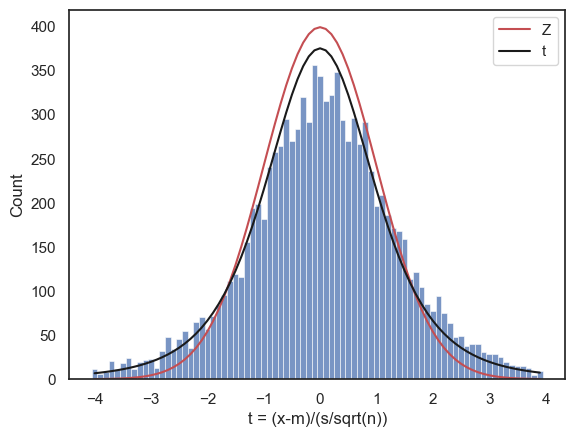

0.1176


In [9]:
# histogram of t
binwidth=0.1
sns.histplot(t, bins = np.arange(-4.05,4.05,binwidth))

x=np.arange(-4,4,binwidth) # suitable range for x axis

# predicted Normal (if the Central Limit Theorem applied, which it doesn't for n=5!)
Z_pdf=stats.norm.pdf(x, 0, 1) # IF CLT applied the t values would follow N(0,1)
Z_freq=Z_pdf*nReps*binwidth
plt.plot(x,Z_freq,'r')

# predicted t distribution with n-1 degrees of freedom
t_pdf=stats.t.pdf(x, n-1, 0, 1) 
t_freq=t_pdf*nReps*binwidth
plt.plot(x,t_freq,'k')


plt.xlabel('t = (x-m)/(s/sqrt(n))')
plt.legend(['Z','t'])
plt.show()

print(sum(t>1.65)/len(t))

Ahh, the t distribution is a much better fit!

Let's check how well they match - 

In [10]:
# use the CDF of the t-distribution to find the proportion of the time t(df=4) should exceed 2.13
# Your code here!

In [11]:
# count what proportion of the time t>=2.13 in your simulation
# Your code here!

Hopefully the match is not too bad! 

Remember that the simulation is random and the proportion of trials with t>=2.13 will change each time you run it. 

If you are getting an unstable estimate of the proportion of trials on which t>=2.13, you may need to increase nReps until the simulation is stable to the degree of precision (say, 2 significant figures) that you desire.

### Percent point function (<tt>ppf</tt>)

You may recall that there are some commonly used Z values, such as Z=1.96 - under the normal distribution a Z score exceeding -1.96 or +1.96 occures only 5% of the time 

Since the $t$ distribution changes shape depending on $n$, there is not such an easy set of 'critical values' to memorise.

Luckily there is a Python function to help us, <tt>stats.t.ppf()</tt>. This is the inverse of the function <tt>stats.t.cdf()</tt> in that:
<ul>
    <li>the CDF tells you the probability that $t$ is less than some value (eg CDF tells us that the probability t is less than 2.13 is 95%)
    <li>the PPF tells you that the t value which is exceeded only 5% of the time is 2.13
</ul>

In [12]:
stats.t.cdf(2.13, 4) # 4 is the degrees of freedom when n=5

0.9498960445583489

In [13]:
stats.t.ppf(0.95, 4)

2.13184678133629

What value of $t$ is exceeded only 1% of the time when $n=9$?

In [14]:
# your code here!

### Further Exercises

1. Try changing $n$ in the simulation above and observe how the $t$ distribution changes (and becomes more like the  distribution when $n$ is large)

2. What value of $n$ is needed for the 95% ppf of the $t(n-1)$ distribution (the $t$ distribution for a sample of size $n$) to match that of the $Z$ distribution to 3 significant figures?


To get you started with exercise 2 here is some code:

In [15]:
stats.norm.ppf(0.95)
# your code here to find the matching PPF for the t(n-1) distribution for various values of n!

1.6448536269514722